<a href="https://colab.research.google.com/github/SAIGANESH02/Wine_Quality_Prediction/blob/main/WineQualityWhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (4).csv


In [ ]:
!pip install tensorflow==2.0.0alpha

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [ ]:
df = pd.read_csv("winequality-white.csv", sep = ";")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.shape

(3428, 12)

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1812,5.6,0.46,0.24,4.8,0.042,24.0,72.0,0.99080,3.29,0.37,12.6,6
3033,6.8,0.24,0.38,8.3,0.045,50.0,185.0,0.99578,3.15,0.50,9.5,6
1798,6.8,0.23,0.29,15.4,0.073,56.0,173.0,0.99840,3.06,0.41,8.7,6
1520,8.3,0.20,0.49,1.7,0.038,38.0,167.0,0.99390,3.05,0.37,10.1,6
1365,6.7,0.13,0.28,1.2,0.046,35.0,140.0,0.99270,3.33,0.33,10.1,7


In [ ]:
test.shape

(1470, 12)

In [ ]:
test.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
# train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
# test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [ ]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1812,5.6,0.46,0.24,4.8,0.042,24.0,72.0,0.99080,3.29,0.37,12.6
3033,6.8,0.24,0.38,8.3,0.045,50.0,185.0,0.99578,3.15,0.50,9.5
1798,6.8,0.23,0.29,15.4,0.073,56.0,173.0,0.99840,3.06,0.41,8.7
1520,8.3,0.20,0.49,1.7,0.038,38.0,167.0,0.99390,3.05,0.37,10.1
1365,6.7,0.13,0.28,1.2,0.046,35.0,140.0,0.99270,3.33,0.33,10.1


In [ ]:
train_y.head()

1812    6
3033    6
1798    6
1520    6
1365    7
Name: quality, dtype: int64

In [ ]:
train_y.max()

9

In [ ]:
train_y.min()

3

In [ ]:
no_features = train_x.shape[1]
no_features

11

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[no_features]),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [ ]:
callbacks = MyCallback()

In [ ]:
history = model.fit(train_x, train_y, epochs=50, callbacks=[callbacks])

Epoch 1/50
3428/3428 [==============================] - 0s 28us/sample - loss: 0.7066 - mae: 0.6648
Epoch 2/50
3428/3428 [==============================] - 0s 27us/sample - loss: 0.7829 - mae: 0.6970
Epoch 3/50
3428/3428 [==============================] - 0s 27us/sample - loss: 0.6424 - mae: 0.6247
Epoch 4/50
3428/3428 [==============================] - 0s 28us/sample - loss: 0.6793 - mae: 0.6419
Epoch 5/50
3428/3428 [==============================] - 0s 28us/sample - loss: 0.6451 - mae: 0.6189
Epoch 6/50
3428/3428 [==============================] - 0s 28us/sample - loss: 0.6312 - mae: 0.6177
Epoch 7/50
3428/3428 [==============================] - 0s 28us/sample - loss: 0.6527 - mae: 0.6319
Epoch 8/50
3428/3428 [==============================] - 0s 28us/sample - loss: 0.6240 - mae: 0.6141
Epoch 9/50
3428/3428 [==============================] - 0s 31us/sample - loss: 0.6429 - mae: 0.6225
Epoch 10/50
3428/3428 [==============================] - 0s 29us/sample - loss: 0.6846 - mae: 0.6462

Text(0.5, 0, 'Epochs')

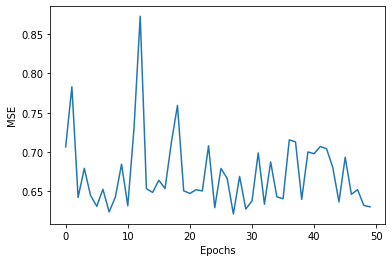

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

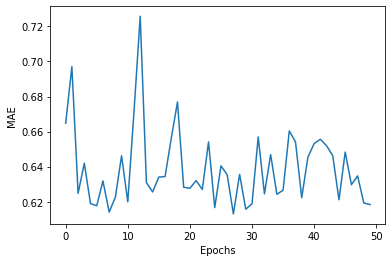

In [ ]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [ ]:
test_mse, test_mae = model.evaluate(test_x, test_y)

1470/1470 [==============================] - 0s 22us/sample - loss: 1.1490 - mae: 0.8790


In [ ]:
test_mse

1.1489670006596313

In [ ]:
test_mae

0.87900466

In [ ]:
predict = model.predict(test_x)
for i in range(predict.shape[0]):
  predict[i][0] = int(predict[i][0])
sum = 0
test_y=list(test_y)
for i in range(predict.shape[0]):
  if (predict[i][0] == test_y[i]):
    sum += 1
print((sum/predict.shape[0])*100)

45.57823129251701
